# **Punto 2 del taller**

# Importar librerias necesarias y montar la data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from matplotlib import cm

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/IA/RegresionLogistica_2_variables/"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/IA/RegresionLogistica_2_variables


# Cargar data y tomar tamaño de los datos de entrenamiento

In [3]:
data = np.loadtxt("datos3.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
dataSize = data.shape
X1 = data[:, 0]
X2 = data[:, 1]
Y = data[:, 2]
m = Y.shape
print('Tamaño de datos de entrenamiento:',m[0])
print(dataSize)

Tamaño de datos de entrenamiento: 100
(100, 3)


# Normalizar la data cargada (solo X1 y X2)

In [4]:
promX = np.mean(data[:, :2], axis=0)
stdX = np.std(data[:, :2], axis=0)

dataNormalizada = np.zeros((dataSize[0], dataSize[1]-1))
for i in range(dataSize[0]):
    for j in range(2):
        dataNormalizada[i, j] = (data[i, j] - promX[j]) / stdX[j]

dataNormalizada = np.column_stack((dataNormalizada, data[:, 2]))

# Segregar datos de entrenamiento

Tamaño de data con Y = 0: (40, 3)
Tamaño de data con Y = 1: (60, 3)


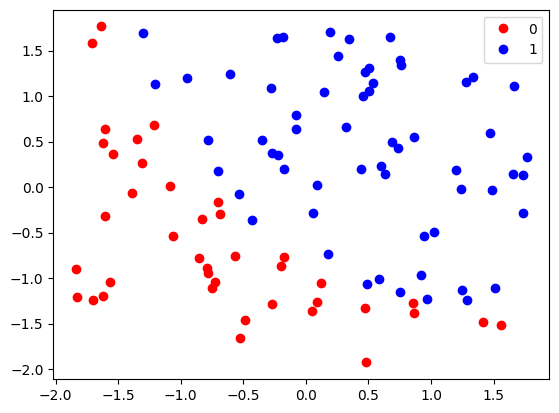

In [5]:
dataConY0 = dataNormalizada[dataNormalizada[:, 2] == 0] # Filtrar las filas donde la Y es igual a 0
dataConY1 = dataNormalizada[dataNormalizada[:, 2] == 1] # Filtrar las filas donde la Y es igual a 1

print('Tamaño de data con Y = 0:', dataConY0.shape)
print('Tamaño de data con Y = 1:', dataConY1.shape)

plt.plot(dataConY0[:, 0],dataConY0[:, 1],'o', color = 'red', label = '0')
plt.plot(dataConY1[:, 0],dataConY1[:, 1],'o', color = 'blue', label = '1')
plt.legend()
plt.show()

# Inicializar los Beta, crear X y Y

In [6]:
Beta = np.zeros((3,1)) # Beta es un vector de 3 filas 1 columna, almacenará a B0, B1 y B2
onesVector = np.ones((dataSize[0],)) # Crea un vector de unos del tamaño de datazise[0]

# Crea la matriz X
X = np.column_stack((onesVector,dataNormalizada[:,0],dataNormalizada[:,1]))

# Crea un vector de 0's de m filas y 1 columna
y = np.zeros((dataSize[0],1))

# Se asignan las salidas al vector y
y[:,0] = data[:,2]

# Función Gradiente Descendente

In [7]:
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((3,1))
  h_beta = np.zeros((m,1))
  betaPrint = np.zeros((numIter,3))

  for i in range(numIter):
    for j in range(3): # Con j=0 se calcula B0, j=1 se calcula B1 y j= 2 calcula B2
      Z = np.dot(X,Beta)
      h = (1 / (1 + np.exp(-Z)))
      temp1 = (np.reshape(X[:,j],(m,1)))

      temp_diff = np.subtract(h, y)

      temp2 = np.sum(np.multiply(temp1,temp_diff))

      betaTemp[j,0] = (Beta[j,0] - (temp2*(alpha/m))) + (Beta[j,0] / m)
      betaPrint[i,j] = betaTemp[j,0]

    Beta = betaTemp
    Z = np.dot(X,Beta)

  return (Beta, betaPrint, h_beta)

In [8]:
alpha = 0.01
numIter = 500
m = m[0] # Cantidad de datos de entrenamiento
J = np.zeros((numIter,1))
Beta = np.zeros((3,1))

Beta, betaPrint, h_beta = Gradiente(Beta,alpha,m,X,y,numIter,J)
print('Beta0: ', Beta[0])
print('Beta1: ', Beta[1])
print('Beta2: ', Beta[2])

Beta0:  [9.88797631]
Beta1:  [27.1119034]
Beta2:  [24.41650942]


# Graficar línea que separa las 2 clases

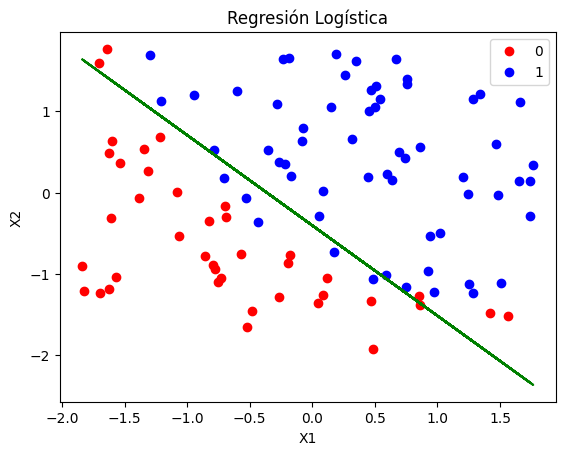

In [9]:
plt.plot(dataConY0[:, 0], dataConY0[:, 1], 'o', color='red', label='0')
plt.plot(dataConY1[:, 0], dataConY1[:, 1], 'o', color='blue', label='1')

# Coeficientes encontrados por el cálculo del gradiente descendente
B0 = Beta[0]
B1 = Beta[1]
B2 = Beta[2]

X1_Normalizado = dataNormalizada[:, 0]

X2New = np.zeros((dataNormalizada.shape[0],1))

#Ecuación de recta
X2New[:,0] = (-B0 - B1 * np.array(X1_Normalizado)) / B2

plt.plot(X1_Normalizado, X2New, c='green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Regresión Logística')
plt.legend()
plt.show()

# Evaluación de desmpeño de la clasificación con regresión logística